## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [ ]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

**<font color='teal'> Start by reviewing the data info.</font>**

In [ ]:
diabetes_data.info()

**<font color='teal'> Apply the describe function to the data.</font>**

In [ ]:
diabetes_data.describe

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [147]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,'nan')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,nan,33.6
1,85,66,29,nan,26.6
2,183,64,nan,nan,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,nan,36.8
765,121,72,23,112,26.2
766,126,60,nan,nan,30.1


**<font color='teal'> Plot histograms of each column. </font>**

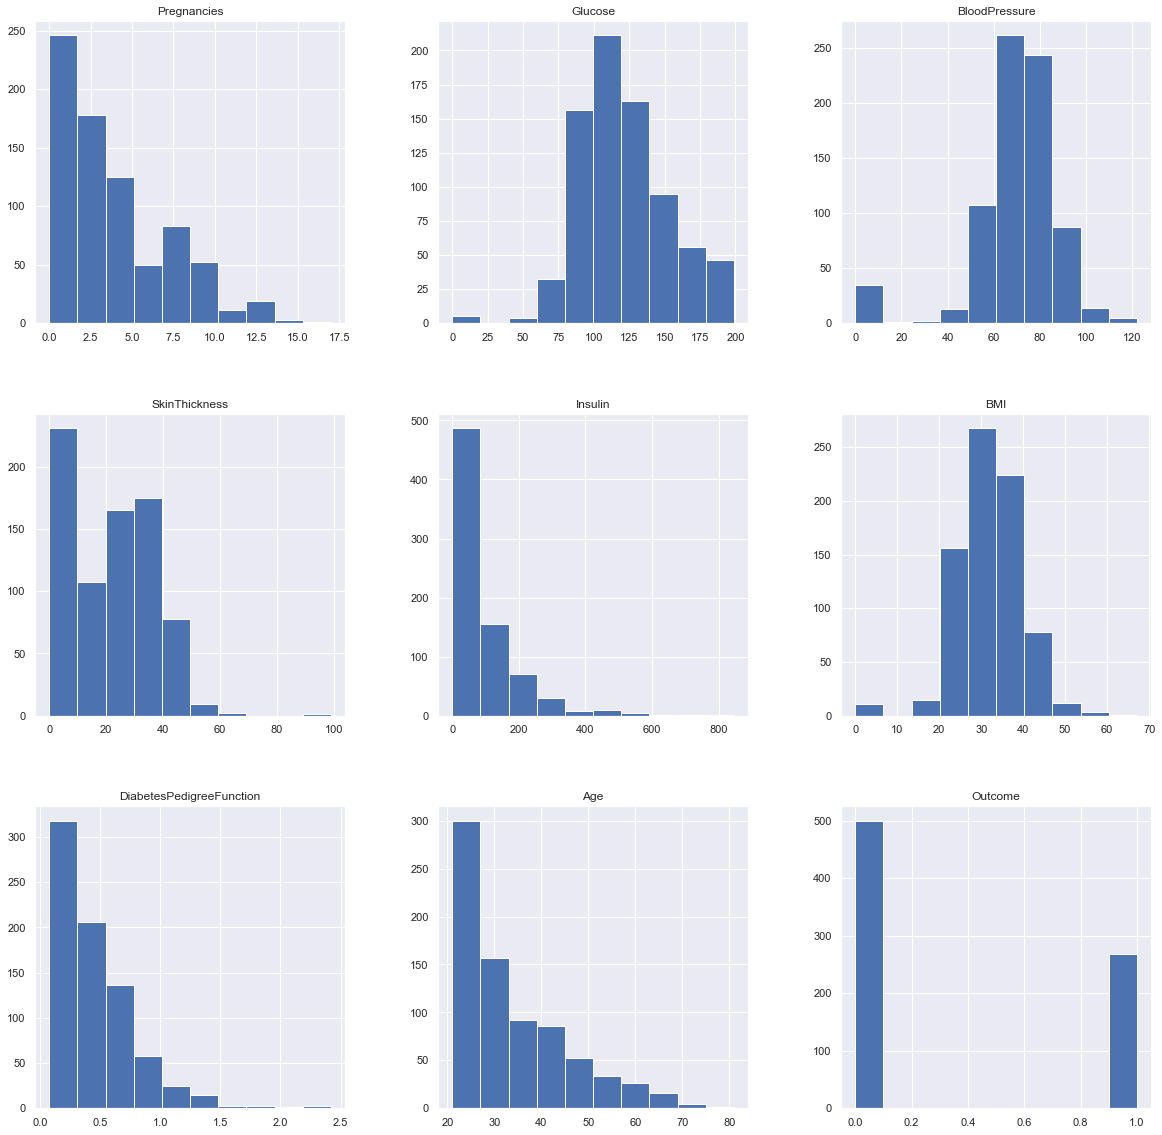

In [148]:
diabetes_data.hist()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

#### Replace the zeros with mean and median values.

In [149]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

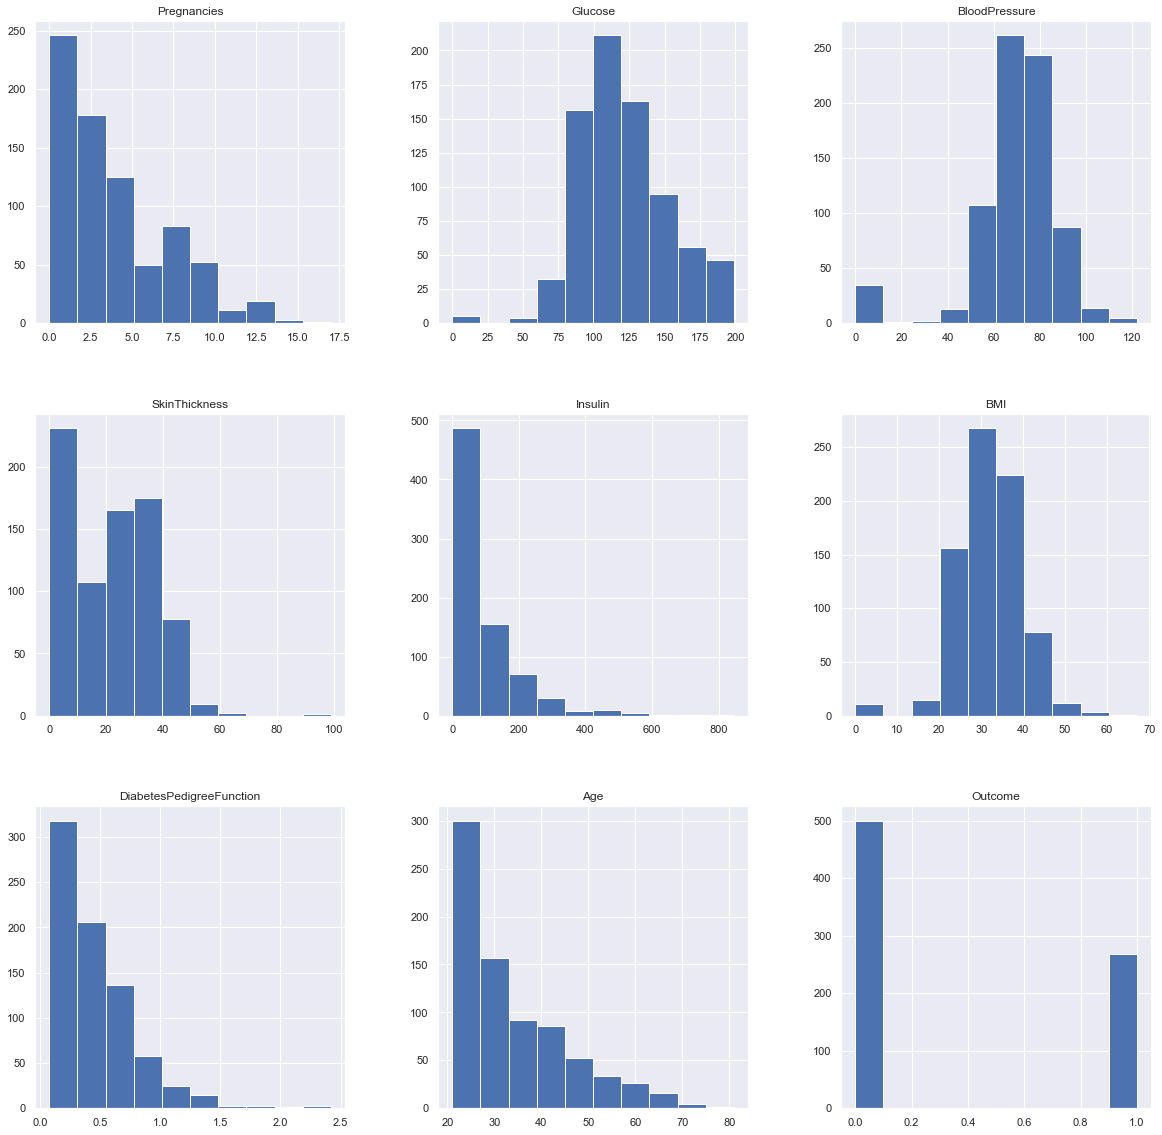

In [150]:
diabetes_data.hist()
plt.rcParams['figure.figsize']=(20,20)
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


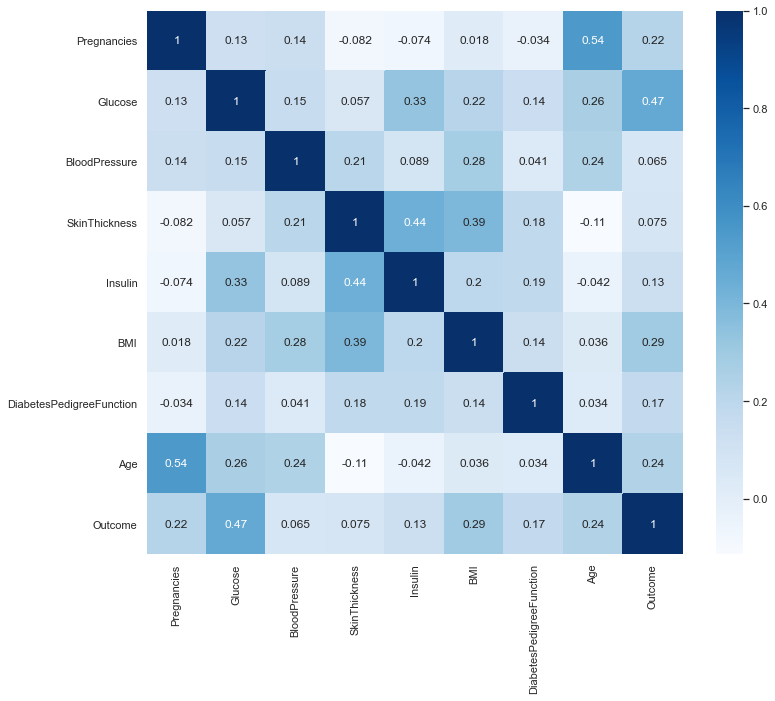

In [151]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [152]:
y = diabetes_data.Outcome
X= diabetes_data.drop('Outcome', axis = 1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_test)

array([[ 0.69748316, -0.70719864, -0.64639893, ...,  0.26575953,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563, ...,  0.488933  ,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, ..., -0.1543317 ,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.19037303,  0.57058226, ...,  0.56770011,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.49054341,  0.01740899, ..., -0.1543317 ,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.35716433,  0.68121692, ...,  0.50206085,
        -0.91851573,  0.16493409]])

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [155]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [156]:
print('train_scores:', train_scores)
print('test_scores:', test_scores)

train_scores: [1.0, 0.8417132216014898, 0.8435754189944135, 0.8119180633147114, 0.8026070763500931, 0.7951582867783985, 0.8007448789571695, 0.7895716945996276, 0.7895716945996276]
test_scores: [0.6883116883116883, 0.7272727272727273, 0.6753246753246753, 0.7229437229437229, 0.6883116883116883, 0.7012987012987013, 0.6926406926406926, 0.7142857142857143, 0.7012987012987013]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [157]:
best_score = -1
for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    score = knn.score(X_train, y_train)
    if score > best_score:
        best_score = score
        best_k = i
print('The max score in training dataset is {} % in the training dataset and k={}:'.format(best_score*100, best_k))

The max score in training dataset is 100.0 % in the training dataset and k=1:


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [158]:
best_score = -1
for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = i
print('The max score in testing dataset is {} and the best_k is {}:'.format(best_score*100, best_k))

The max score in testing dataset is 72.72727272727273 and the best_k is 2:


Plot the train and test model performance by number of neighbors.

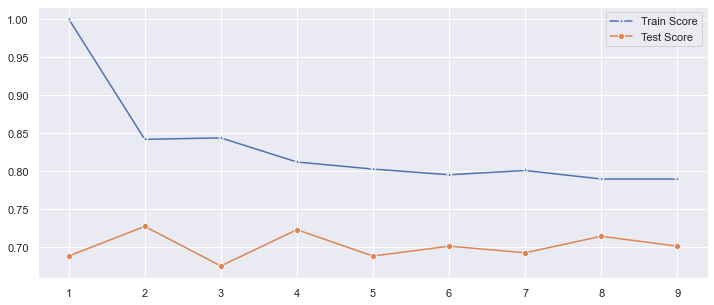

In [159]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [160]:
knn = KNeighborsClassifier(2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [161]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

<AxesSubplot:>

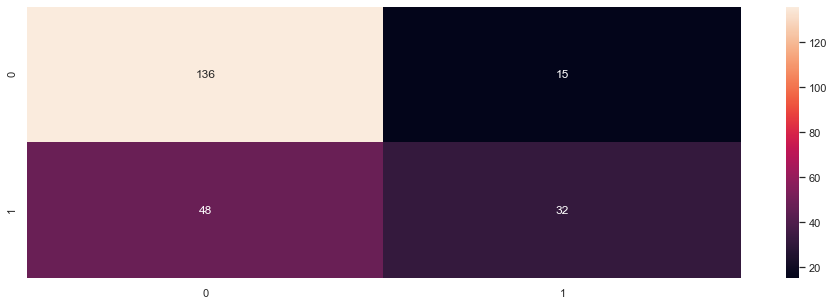

In [162]:
plt.figure(figsize = (16,5))
sns.heatmap(pl, annot = True, fmt='g')


**<font color='teal'> Print the classification report </font>**

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       151
           1       0.68      0.40      0.50        80

    accuracy                           0.73       231
   macro avg       0.71      0.65      0.66       231
weighted avg       0.72      0.73      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [165]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [166]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We need to find the best number of the estimator

In [168]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42) 
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))


In [169]:
maxs = max(scores)
maxs_idx = scores.index(maxs)

In [170]:
print(f"Accuracy Score: {maxs} with n_estimators: {maxs_idx}")

Accuracy Score: 0.7835497835497836 with n_estimators: 23


Now, we are going to use GridSearch on Random Forest Classifier

In [172]:
param_grid = { 
    'n_estimators': np.arange(1,50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
#Should we use n_estimators: 23 or rfc for estimator = ?
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=199),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [173]:
print("Best Score:" + str(CV_rfc.best_score_))

Best Score:0.7913637937002422


In [174]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 47}

In [ ]:
#How to put the CV_rfc.best_params_ autpmatically on Random Forest below?

In [175]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 47, max_depth=8, criterion='gini')

In [176]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=47,
                       random_state=42)

In [177]:
pred=rfc1.predict(x_test)

In [178]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest data is: ",accuracy_score(y_test,pred))

Accuracy for Random Forest data is:  0.7445887445887446


In [179]:
print(classification_report(pred, y_test)) 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       148
           1       0.65      0.63      0.64        83

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Let's see how RandomizedSearchCV  will perform 

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid) 

random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 
print(random_search.best_params_)

RandomForestClassifier(max_depth=6, n_estimators=45)
{'n_estimators': 45, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}


In [187]:
model_random = RandomForestClassifier(max_depth=6, 
                                      max_features='auto', 
                                      max_leaf_nodes=6,
                                      criterion= 'gini',
                                      n_estimators=45) 
model_random.fit(X_train, y_train) 
y_pred_rand = model_random.predict(X_test) 
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       170
           1       0.54      0.70      0.61        61

    accuracy                           0.76       231
   macro avg       0.71      0.74      0.72       231
weighted avg       0.79      0.76      0.77       231

